# ML4NLP1

## Starting Point for Exercise 1, part I

This notebook is supposed to serve as a starting point and/or inspiration when starting exercise 1, part I.

One of the goals of this exercise is to get you acquainted with sklearn and related libraries like pandas and numpy. You will probably need to consult the documentation of those libraries:
- sklearn: [Documentation](https://scikit-learn.org/stable/user_guide.html)
- Pandas: [Documentation](https://pandas.pydata.org/docs/#)
- NumPy: [Documentation](https://numpy.org/doc/)
- SHAP: [Documentation](https://shap.readthedocs.io/en/latest/index.html)

## Task Description

Follow the instructions in this notebook to:

1. Explore the data and create training/test splits for your experiments

2. Build a LogisticRegression classifier and design some relevant features to apply it to your data

3. Conduct hyperparameter tuning to find the optimal hyperparameters for your model

4. Explore your model's predictions and conduct an error analysis to see where the model fails

5. Conduct an interpretability analysis, investigating the model's most important features.

6. Conduct an ablation study using a subset of languages


Throughout the notebook, there are questions that you should address in your report. These are marked with 🗒❓.

☝ Note, these questions are intended to provide you with an opportunity to reflect on what it is that you are doing and the kind of challenges you might face along the way.




In [2]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

### Loading the datasets

In [3]:
# Download dataset
!gdown 1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs # x_train
!gdown 1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6 # x_test
!gdown 1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl # y_train
!gdown 1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X # y_test

Downloading...
From: https://drive.google.com/uc?id=1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs
To: /content/x_train.txt
100% 64.1M/64.1M [00:00<00:00, 222MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6
To: /content/x_test.txt
100% 65.2M/65.2M [00:00<00:00, 183MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl
To: /content/y_train.txt
100% 480k/480k [00:00<00:00, 91.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X
To: /content/y_test.txt
100% 480k/480k [00:00<00:00, 93.6MB/s]


In [4]:
with open(f'x_train.txt') as f:
    x_train = f.read().splitlines()
with open(f'y_train.txt') as f:
    y_train = f.read().splitlines()
with open(f'x_test.txt') as f:
    x_test = f.read().splitlines()
with open(f'y_test.txt') as f:
    y_test = f.read().splitlines()

In [5]:
# Combine x_train and y_train into one dataframe
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
# Write train_df to csv with tab as separator
train_df.to_csv('train_df.csv', index=False, sep='\t')
# Comibne x_test and y_test into one dataframe
test_df = pd.DataFrame({'text': x_test, 'label': y_test})
# Inspect the first 5 items in the train split
train_df.head()

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,mai
3,"Après lo cort periòde d'establiment a Basilèa,...",oci
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,tha


In [6]:
# Get list of all labels
labels = train_df['label'].unique().tolist()
print(labels)

['est', 'swe', 'mai', 'oci', 'tha', 'orm', 'lim', 'guj', 'pnb', 'zea', 'krc', 'hat', 'pcd', 'tam', 'vie', 'pan', 'szl', 'ckb', 'fur', 'wuu', 'arz', 'ton', 'eus', 'map-bms', 'glk', 'nld', 'bod', 'jpn', 'arg', 'srd', 'ext', 'sin', 'kur', 'che', 'tuk', 'pag', 'tur', 'als', 'koi', 'lat', 'urd', 'tat', 'bxr', 'ind', 'kir', 'zh-yue', 'dan', 'por', 'fra', 'ori', 'nob', 'jbo', 'kok', 'amh', 'khm', 'hbs', 'slv', 'bos', 'tet', 'zho', 'kor', 'sah', 'rup', 'ast', 'wol', 'bul', 'gla', 'msa', 'crh', 'lug', 'sun', 'bre', 'mon', 'nep', 'ibo', 'cdo', 'asm', 'grn', 'hin', 'mar', 'lin', 'ile', 'lmo', 'mya', 'ilo', 'csb', 'tyv', 'gle', 'nan', 'jam', 'scn', 'be-tarask', 'diq', 'cor', 'fao', 'mlg', 'yid', 'sme', 'spa', 'kbd', 'udm', 'isl', 'ksh', 'san', 'aze', 'nap', 'dsb', 'pam', 'cym', 'srp', 'stq', 'tel', 'swa', 'vls', 'mzn', 'bel', 'lad', 'ina', 'ava', 'lao', 'min', 'ita', 'nds-nl', 'oss', 'kab', 'pus', 'fin', 'snd', 'kaa', 'fas', 'cbk', 'cat', 'nci', 'mhr', 'roa-tara', 'frp', 'ron', 'new', 'bar', 'ltg'


### 1.1 Exploring the training data

📝❓Take a look at a couple of texts from different languages and answer the following questions:

1. Do you notice anything that might be challenging for the classification?
2. How is the data distributed? (i.e., how many instances per label are there in the training and test set? Is it a balanced dataset?)
3. Do you think the train/test split is appropriate (i.e., is the test data representative of the training data)? If not, please rearrange the data in a more appropriate way.


In [7]:
# TODO: Inspect the training data

train_df, test_df
#Checking the total number of rows in the train and test data frames

(                                                     text label
 0       Klement Gottwaldi surnukeha palsameeriti ning ...   est
 1       Sebes, Joseph; Pereira Thomas (1961) (på eng)....   swe
 2       भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...   mai
 3       Après lo cort periòde d'establiment a Basilèa,...   oci
 4       ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...   tha
 ...                                                   ...   ...
 117495  Nekoliko prašćića je rođeno na farmi Arableovi...   bos
 117496  Tahiti of Otaheite is 'n eilandj in 't zuje va...   lim
 117497  同年，太后崩。絳侯周勃、陳平諸臣共謀誅呂。朱虛侯章已殺呂產，文帝使人持節勞章。朱虛侯欲奪節信...   lzh
 117498  I det mindste opnåede Venedig den 18. april 14...   dan
 117499  KR tók fljótlega að sér að bjóða uppá æfingar ...   isl
 
 [117500 rows x 2 columns],
                                                      text label
 0       Ne l fin de l seclo XIX l Japon era inda çconh...   mwl
 1       Schiedam is gelegen tussen Rotterdam en Vlaard...  

In [8]:
train_df.isnull().sum() + test_df.isnull().sum()
#Checking for null values in the train and test data frames

,0
text,0
label,0


In [9]:
def get_label_counts(df):
  lable_count = df['label'].value_counts().to_dict()
  return lable_count
  #Defining a function to get the total label counts of each language in the df's

train_label_counts = get_label_counts(train_df)
test_label_counts = get_label_counts(test_df)


print(f"Train_df Label Counts: {train_label_counts}")
print(f"Test_df Label Counts: {test_label_counts}")
# Printing a dictionary with the label and the total number of counts of each label.


Train_df Label Counts: {'est': 500, 'eng': 500, 'vep': 500, 'sgs': 500, 'uig': 500, 'lit': 500, 'sqi': 500, 'som': 500, 'slk': 500, 'sco': 500, 'ukr': 500, 'mri': 500, 'hrv': 500, 'vol': 500, 'glv': 500, 'kom': 500, 'ben': 500, 'ido': 500, 'jav': 500, 'tcy': 500, 'mrj': 500, 'hif': 500, 'sna': 500, 'war': 500, 'mlt': 500, 'egl': 500, 'tsn': 500, 'lez': 500, 'mdf': 500, 'ace': 500, 'rus': 500, 'bak': 500, 'min': 500, 'ita': 500, 'nds-nl': 500, 'oss': 500, 'kab': 500, 'pus': 500, 'fin': 500, 'snd': 500, 'kaa': 500, 'fas': 500, 'cbk': 500, 'cat': 500, 'nci': 500, 'mhr': 500, 'roa-tara': 500, 'frp': 500, 'ron': 500, 'new': 500, 'bar': 500, 'ltg': 500, 'vro': 500, 'lav': 500, 'ces': 500, 'yor': 500, 'nso': 500, 'hak': 500, 'azb': 500, 'ava': 500, 'mwl': 500, 'lrc': 500, 'div': 500, 'myv': 500, 'cos': 500, 'hun': 500, 'nrm': 500, 'pfl': 500, 'wln': 500, 'bho': 500, 'epo': 500, 'deu': 500, 'nav': 500, 'pol': 500, 'que': 500, 'rue': 500, 'vec': 500, 'nds': 500, 'aym': 500, 'tgk': 500, 'ceb': 5

In [10]:
total_rows = len(train_df) + len(test_df)
#print(f"Total number of rows: {total_rows}")

train_rows = int(total_rows * .75) #splitting the data into 75/25 ratio
test_rows = total_rows - train_rows



combined_df = pd.concat([train_df, test_df], ignore_index=True)
# Concatenating train and test dataframes

combined_df = combined_df.sample(frac=1, random_state=42)
# Shuffleing the combined_df


train_df = combined_df[:train_rows]
test_df = combined_df[train_rows:]
# Split the combined dataframe into train and test sets



In [11]:
def get_label_counts(df):
  lable_count = df['label'].value_counts().to_dict()
  return lable_count
  #Defining a function to get the total label counts of each language in the df's

train_label_counts = get_label_counts(train_df)
test_label_counts = get_label_counts(test_df)

print(f"Train_df Label Counts: {train_label_counts}")
print(f"Test_df Label Counts: {test_label_counts}")

Train_df Label Counts: {'dsb': 788, 'olo': 786, 'ile': 783, 'ilo': 782, 'mlg': 778, 'frp': 777, 'tyv': 777, 'bel': 775, 'srd': 774, 'lav': 774, 'ell': 773, 'ukr': 772, 'fao': 772, 'amh': 772, 'aze': 772, 'nso': 771, 'bre': 771, 'roh': 770, 'ido': 770, 'kbd': 770, 'ron': 769, 'mon': 768, 'ibo': 768, 'kaz': 767, 'srn': 767, 'bos': 766, 'nan': 766, 'hif': 766, 'udm': 765, 'yid': 765, 'tgk': 764, 'ces': 764, 'nob': 764, 'sqi': 764, 'kor': 763, 'swa': 763, 'tsn': 763, 'deu': 763, 'swe': 763, 'tur': 763, 'koi': 763, 'mri': 763, 'wol': 763, 'jav': 762, 'snd': 762, 'pfl': 762, 'orm': 762, 'pol': 762, 'vep': 762, 'new': 761, 'heb': 761, 'nds': 761, 'ava': 761, 'urd': 761, 'ben': 760, 'hak': 760, 'sme': 760, 'wuu': 760, 'tet': 759, 'tgl': 759, 'pcd': 759, 'div': 759, 'jam': 759, 'arg': 758, 'kok': 758, 'khm': 758, 'hye': 758, 'ang': 758, 'be-tarask': 757, 'chv': 757, 'jpn': 757, 'hrv': 757, 'gle': 757, 'nav': 756, 'bpy': 756, 'gag': 756, 'uzb': 756, 'kin': 755, 'ksh': 755, 'lin': 755, 'est': 755

In [12]:
print(train_df[train_df['label'] == 'nob'])


                                                     text label
41931   Buffy Summers (Sarah Michelle Gellar) flytter ...   nob
166687  Fra 2002 til oppgraderingen i 2005 var en 2-li...   nob
176792  Den 16. november 1937 skulle Georg Donatus, Ce...   nob
46362   Venstres leder er Trine Skei Grande fra Oslo, ...   nob
224122  Brunvand har særlig bidratt til å etablere beg...   nob
...                                                   ...   ...
233559  Anke Möhring (født 28. august 1969 i Magdeburg...   nob
6157    Venstre (V) er et sosialliberalt politisk part...   nob
83025   Beleiringen av Stralsund fant sted mellom 1711...   nob
104844  Så lenge for- og bakhjulene roterer med samme ...   nob
21140   Etter at Harrison tidlig i 1975 ble løst fra s...   nob

[764 rows x 2 columns]


### 1.2 Data preparation

Get a subset of the train/test data that includes 20 languages.
Include English, German, Dutch, Danish, Swedish, Norwegian, and Japanese, plus 13 additional languages of your choice based on the items in the list of labels.

In [13]:
# TODO: Create your train/test subsets of languages


subsets = ['eng', 'deu', 'nld', 'dan', 'swe', 'nno', 'jpn', 'ita', 'tel', 'hin', 'tam', 'kan', 'bul', 'ara', 'kor', 'rus', 'fra', 'pol', 'fin', 'tha']

# Filter the train and test dataframes to include only the selected languages
train_subset = train_df[train_df['label'].isin(subsets)]
test_subset = test_df[test_df['label'].isin(subsets)]

# Print the number of rows for each subset
print("Number of rows in train subset:", train_subset.shape[0])
print("Number of rows in test subset:", test_subset.shape[0])

Number of rows in train subset: 14967
Number of rows in test subset: 5033


In [14]:
train_subset

,text,label
219737,Having risen through the Real Madrid youth ran...,eng
152427,"సంకర్షణపురం గ్రామానికి చినపాలపర్రు, దాకరం, గుర...",tel
185884,"En 1820, une sucrerie fut installée dans l'ail...",fra
200893,Доходы Русской православной церкви складываютс...,rus
111583,През сезон 1999/00 Пиер носи екипа на Витес. Н...,bul
...,...,...
33076,Most of the population (as of 2000) speaks Fre...,eng
99437,وتقليدياً، المؤرخين لها تاريخ العصور الوسطى من...,ara
208811,"L'attentato, che ebbe una possente risonanza i...",ita
83813,ఇది మండల కేంద్రమైన రాజవొమ్మంగి నుండి 10 కి. మీ...,tel


In [15]:
print(len(y_train))

117500


In [16]:
# TODO: With the following code, we wanted to ENCODE the labels, however, our cat was walking on the keyboard and some of it got changed. Can you fix it?
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


y_train = train_subset['label']
y_test = test_subset['label']

label_encoder.fit(y_train)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
print(label_encoder.classes_)
print(y_train_encoded)
print(y_test_encoded)

['ara' 'bul' 'dan' 'deu' 'eng' 'fin' 'fra' 'hin' 'ita' 'jpn' 'kan' 'kor'
 'nld' 'nno' 'pol' 'rus' 'swe' 'tam' 'tel' 'tha']
[ 4 18  6 ...  8 18 19]
[18 15 17 ... 17  2 10]


In [17]:
x_train = train_subset['text']
x_test = test_subset['text']

### 2.1 Build a LogisticRegression classifier

To start with, we're going to build a very simple LogisticRegression classifier.
Use a `Pipeline` to chain togther a `CountVectorizer` and a `LogisticRegression` estimator. Then perform a 5-fold cross validation and report the scores of this model as a baseline.

In [18]:
from re import X
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# TODO: Define a very basic pipeline using a CountVectorizer and a LogisticRegression classifier
count_vect = CountVectorizer()

log_reg = LogisticRegression(random_state=42)

Pipe = Pipeline([
    ('vect', count_vect),
    ('clf', log_reg)
])

result = cross_val_score(Pipe, x_train, y_train, cv=5)
print(f'CV scores on {len(result)} folds: {result}')
print(f'Average CV score: {result.mean():.3f}')



CV scores on 5 folds: [0.96325985 0.96626587 0.96525226 0.96458403 0.96257935]
Average CV score: 0.964


In [19]:
# TODO: Run a cross validation to estimate the model's expected performance


### 2.2 Feature Engineering

So far, we've only considered the basic `CountVectorizer` at the word level to encode our input texts for our model.

Your task is to apply some text preprocessing and engineer some more informative features.

To do this, think about what other features might be relevant for determining the language of an input text.

Define a custom set of feature extractors and implement the necessary preprocessing steps to extract these features from strings.

Then initialise a processing pipeline that converts your input data into features that the model can take as input.

☝ Note, this step can be as involved as your heart desires, there is only one minimal requirement: you must use something more than the base `CountVectorizer`. We recommend that you take a look at the [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html) and [`TransformerMixin`](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html#transformermixin) classes from `sk-learn`, as these can be helpful for defining custom transformers.


In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(random_state=42, max_iter=5000)),
])

pipe.fit(x_train,y_train_encoded)
# Calculate cross-validation score
result = cross_val_score(pipe, x_train, y_train_encoded, cv=5)
print(f'CV scores on {len(result)} folds: {result}')
print(f'Average CV score: {result.mean():.3f}')


CV scores on 5 folds: [0.97361389 0.97628591 0.97828266 0.97527564 0.97995322]
Average CV score: 0.977


---

### 3.1 Grid Search

Use sklearn's GridSearchCV and experiment with the following hyperparameters:
1. Penalty (Regularization)
2. Solver
3. Experiment with parameters of the Vectorizer (optional, but highly advised)

☝ Note, don't overdo it at the beginning, since runtime might go up fast!

Make sure you read through the [docs](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) to get an understanding of what these parameters do.


In [21]:
# TODO: GridSearchCV

from sklearn.model_selection import GridSearchCV

# Define the parameter grid with a reduced search space
param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'vect__max_features': [100, 800],  # Reduced search space
    'clf__penalty': ['l2'],
    'clf__solver': ['liblinear'],
}

# Create GridSearchCV object with error handling
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')

# Fit the model using the DataFrame with 'text' column
grid_search.fit(x_train, y_train_encoded)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)



Best parameters found:  {'clf__penalty': 'l2', 'clf__solver': 'liblinear', 'vect__max_features': 800, 'vect__ngram_range': (1, 1)}
Best cross-validation score:  0.9503575142265822


### 3.2 Best Model Selection

After conducting our Grid Search, we should be able to identify our best model by inspecting the using the Grid Search result attribute `cv_results_`. (Hint: `cv_results_` returns a dictionay, so convert it to a Pandas Dataframe for easy inspection.)

📝❓ What were the hyperparameter combinations for your best-performing model on the test set.

📝❓ What is the advantage of grid search cross-validation?


In [22]:
# TODO: Select the best model based on the GridSearch results

cv_results_df = pd.DataFrame(grid_search.cv_results_)


In [23]:
# Display the first few rows to get an overview
print(cv_results_df.head())

# Find the row with the highest mean test score
best_row = cv_results_df.loc[cv_results_df['mean_test_score'].idxmax()]

# Access the best parameters
best_params = best_row['params']
print("Best parameters found:", best_params)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.571007      0.914239         0.383641        0.114537   
1       9.708475      0.779606         0.628860        0.125742   
2       5.128716      1.719701         0.469523        0.128150   
3       9.870504      1.855891         0.700016        0.200164   

  param_clf__penalty param_clf__solver  param_vect__max_features  \
0                 l2         liblinear                       100   
1                 l2         liblinear                       100   
2                 l2         liblinear                       800   
3                 l2         liblinear                       800   

  param_vect__ngram_range                                             params  \
0                  (1, 1)  {'clf__penalty': 'l2', 'clf__solver': 'libline...   
1                  (1, 2)  {'clf__penalty': 'l2', 'clf__solver': 'libline...   
2                  (1, 1)  {'clf__penalty': 'l2', 'clf__solver': 'libline...   
3  

## 3.3 Model Evaluation

Once you have identified your best model, use it to predict the languages of texts in the test split.

📝❓ According to standard metrics (e.g. Accurracy, Precision, Recall and F1), how well does your model perform on the heldout test set?


In [24]:
# TODO: Evaluate the model by inspecting the predictions on the heldout test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the best model from the grid search
best_model = grid_search.best_estimator_
print(best_model)



y_pred = best_model.predict(x_test)


accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Pipeline(steps=[('vect', CountVectorizer(max_features=800)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 LogisticRegression(max_iter=5000, random_state=42,
                                    solver='liblinear'))])
Accuracy: 0.9470
Precision: 0.9579
Recall: 0.9470
F1-Score: 0.9489


---

### 4.1 Error Analysis

Inspect your model's predictions using a confusion matrix and provide a summary of what you find in your report.

📝❓ Where does your model do well and where does it fail?

📝❓ What are some possible reasons for why it fails in these cases?

Acc: 0.947


Classification Report:



,precision,recall,f1-score,support
ara,1.000,0.984,0.992,249.000
bul,0.934,0.934,0.934,256.000
dan,0.964,0.942,0.953,258.000
deu,0.947,0.983,0.965,237.000
eng,0.831,0.984,0.901,249.000
fin,0.992,0.977,0.984,257.000
fra,0.948,0.992,0.969,255.000
hin,1.000,0.974,0.987,267.000
ita,0.984,0.973,0.978,256.000
jpn,0.622,0.947,0.750,243.000



--------------------


Confusion Matrix:



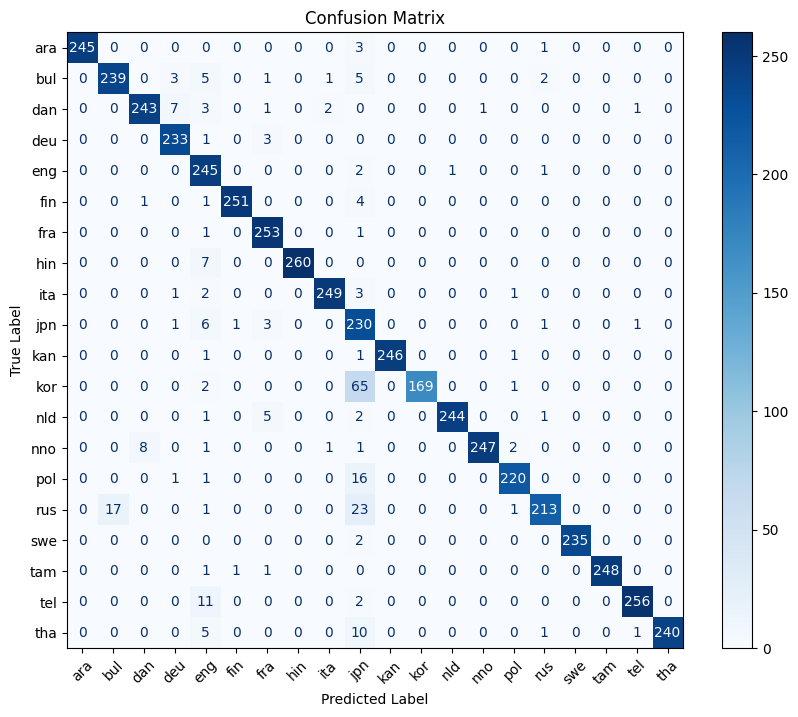

In [25]:
# TODO: Inspect the model's predcitions on the different classes

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt



print(f'Acc: {accuracy_score(y_test_encoded, y_pred):.3f}\n')

# Classification Report
print("\nClassification Report:\n")
# Store the output of classification_report in the 'report' variable
report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_, digits=3, output_dict=True)
#print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_, digits=3))
report_df = pd.DataFrame(report).transpose()


styled_report_df = report_df.style.set_properties(**{
    'background-color': 'lightgray',
    'color': 'black',
    'border-color': 'white'
}).format("{:.3f}")


display(styled_report_df)
print("\n--------------------\n")


print("\nConfusion Matrix:\n")

# Create the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)


fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




---

### 5.1 Interpretability Analysis

Now that you have your best model, it's time to dive deep into understanding how the model makes predictions.

It is important that we can explain and visualise our models to improve task performance. Explainable models help characterise model fairness, transparency, and outcomes.

Let's try to understand what our best-performing logistic regression classification model has learned.

Inspect the 20 most important features for the languages English, Swedish, Norwegian, and Japanese. Please make sure that the features are named and human-interpretable, not things like "Feat_1". (Hint: if you have used custom feature extractors in your pipeline, you may need to adapt these to make sure that the feature names are maintained.)

📝❓ What is more important, extra features or the outputs of the vectorizer? Please discuss.

We recommend using the [SHAP library](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html) as discussed in the tutorial. We've provided an example notebook for working with SHAP for multi-class classification in the course GitHub repo.

☝ Note, if you prefer to use another interpretability tool, we will accept answers from any explanation library/method as long as the explanations for the model weights are provided in a structured/clear way.



In [26]:
# To use shap, we first need to install it into the current environment
!pip install --upgrade shap

import shap



In [27]:
subsubsets = ['eng', 'jpn', 'nno', 'swe']

train_subsubset = train_df[train_df['label'].isin(subsubsets)]
test_subsubset = test_df[test_df['label'].isin(subsubsets)]

# Print the number of rows for each subset
print("Number of rows in train subset:", train_subsubset.shape[0])
print("Number of rows in test subset:", test_subsubset.shape[0])


label_encoder = LabelEncoder()

y_train_subsubset = train_subsubset['label']
y_test_subsubset = test_subsubset['label']

x_train_subsubset = train_subsubset['text']
x_test_subsubset = test_subsubset['text']

label_encoder.fit(y_train)
y_train_subsubset_encoded = label_encoder.transform(y_train_subsubset)
y_test_subsubset_encoded = label_encoder.transform(y_test_subsubset)



Number of rows in train subset: 3011
Number of rows in test subset: 989


In [28]:
pipe = Pipeline([
    ('vect', CountVectorizer()),  # Convert text to counts
    ('tfidf', TfidfTransformer()),  # Convert counts to TF-IDF
    ('clf', LogisticRegression(random_state=42, max_iter=5000)),  # Logistic Regression classifier
])

pipe.fit(x_train_subsubset,y_train_subsubset_encoded)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(max_iter=5000, random_state=42))])

In [29]:
feature_names = pipe.named_steps['vect'].get_feature_names_out()

def pipeline_transform(X):
    return pipe[:-1].transform(X).toarray()


# Initialize SHAP explainer
explainer = shap.Explainer(pipe[-1], pipeline_transform(x_train_subsubset), feature_names=feature_names)


In [30]:

# Compute SHAP values for the subset
shap_values = explainer(pipeline_transform(x_test_subsubset))

print(shap_values.shape)

(989, 36966, 4)


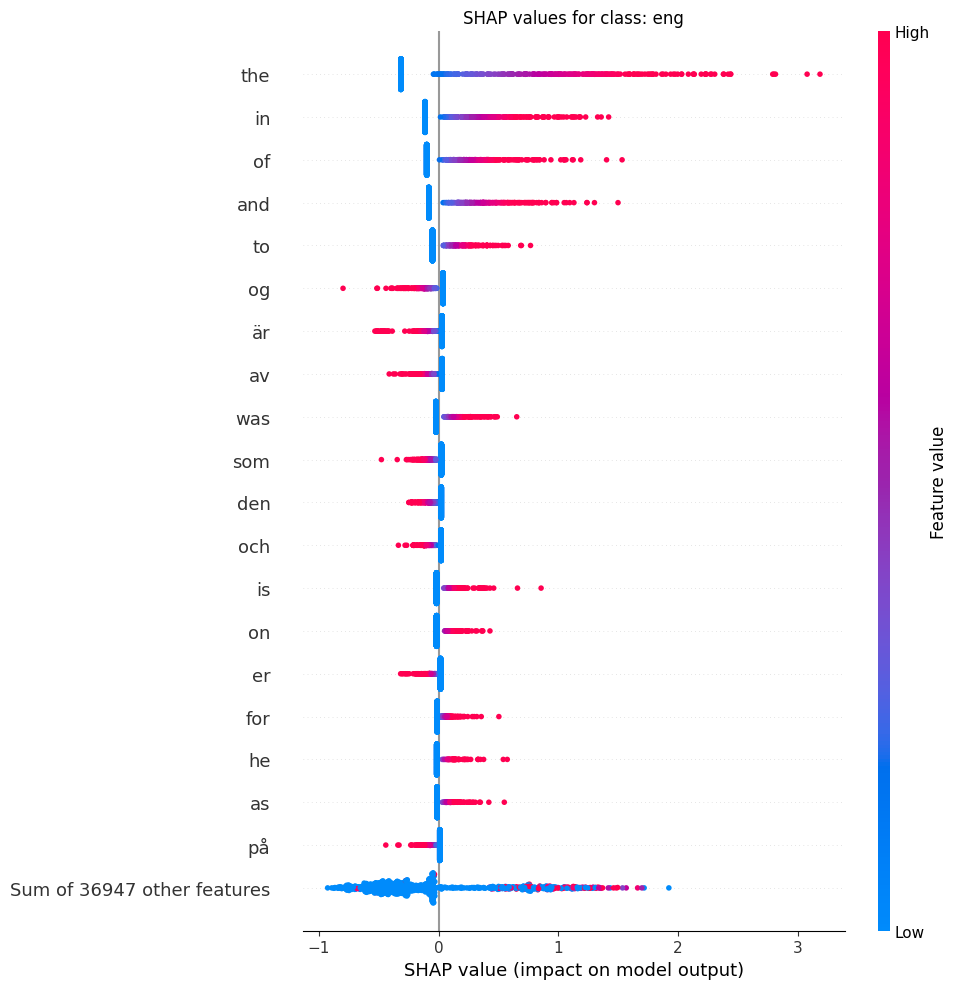

<ipython-input-31-1b81c0434b1e>:8: UserWarning: Glyph 12414 (\N{HIRAGANA LETTER MA}) missing from current font.
  plt.tight_layout()
<ipython-input-31-1b81c0434b1e>:8: UserWarning: Glyph 12383 (\N{HIRAGANA LETTER TA}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12414 (\N{HIRAGANA LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12383 (\N{HIRAGANA LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


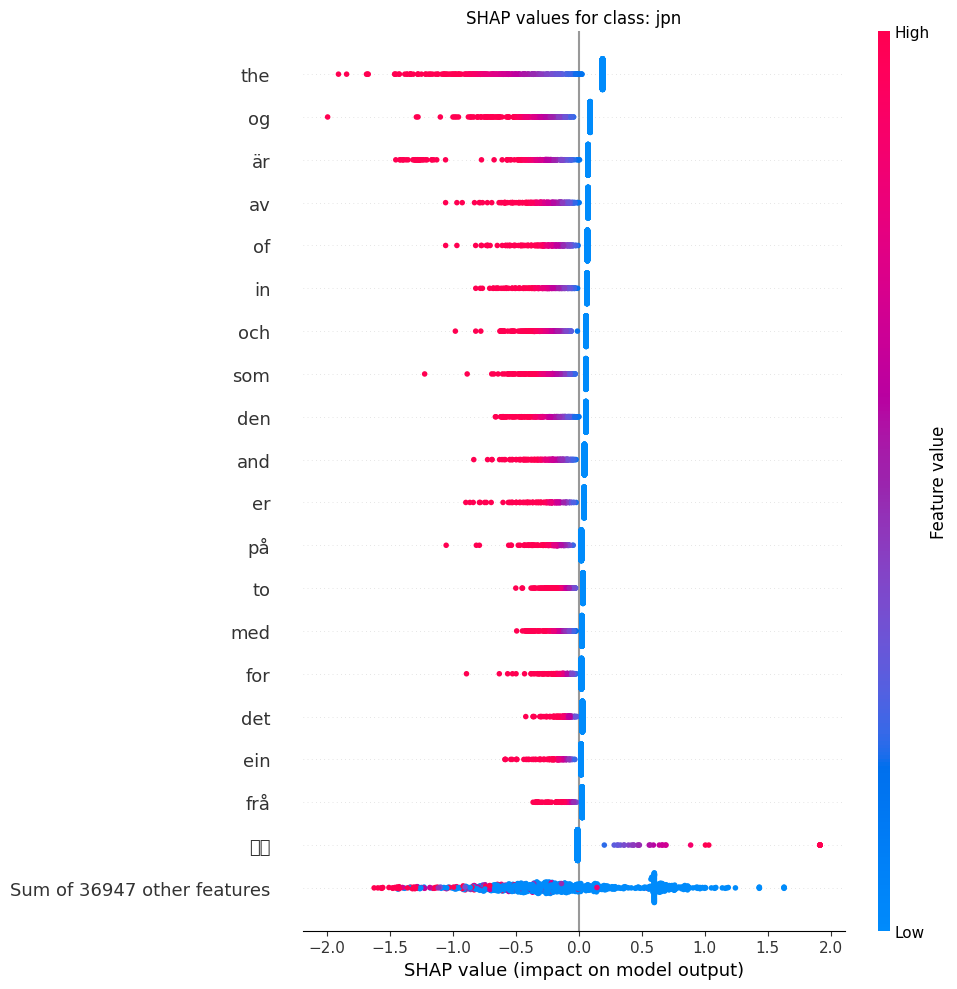

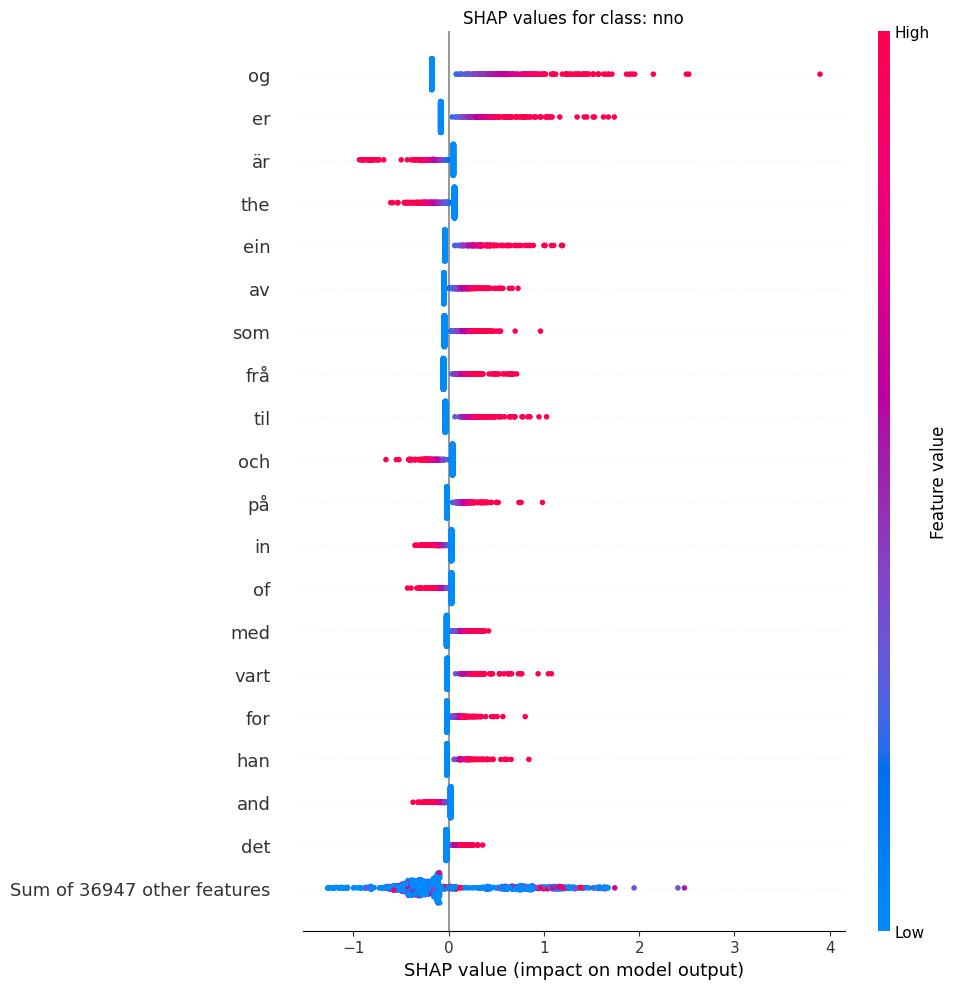

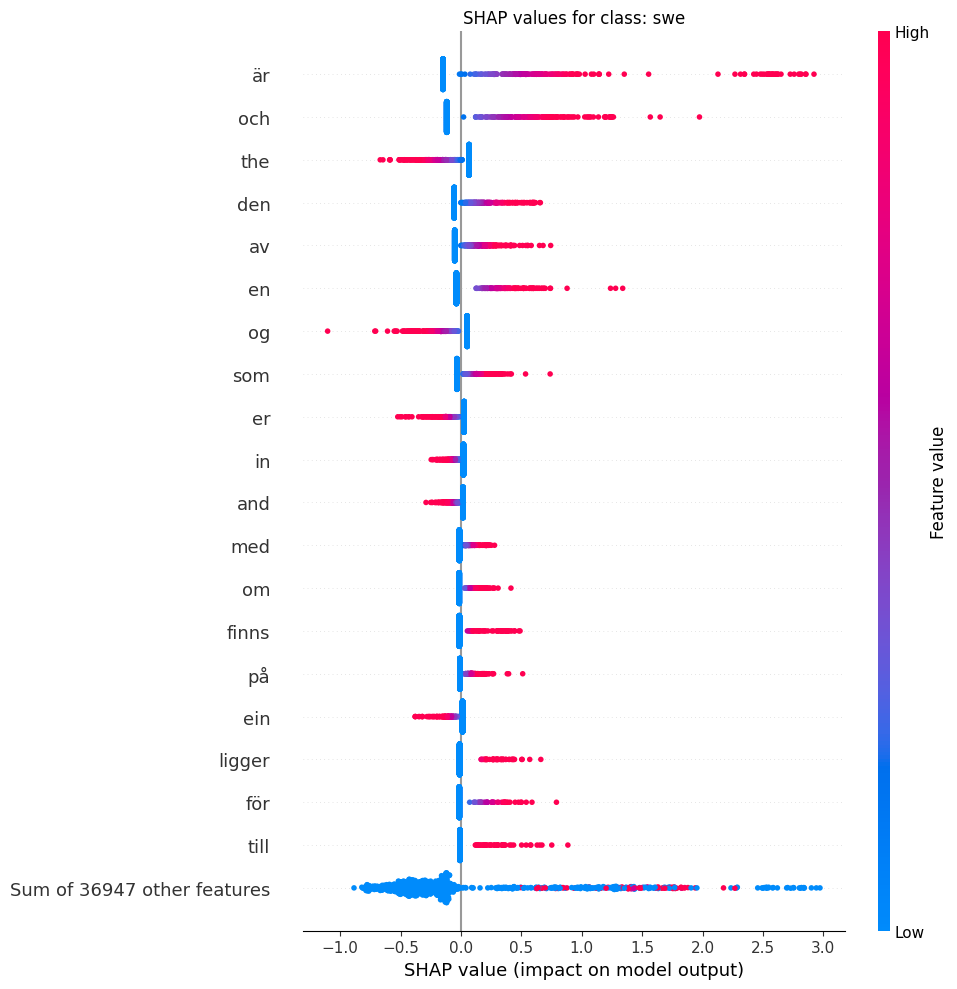

In [31]:


# Create a single figure with beeswarm plots for all categories
for i, subsubset in enumerate(subsubsets):
    # Beeswarm plot
    figsize = (10, 10)
    plt.figure(figsize=figsize)
    shap.plots.beeswarm(shap_values[:, :, i], max_display=20, show=False, plot_size=figsize)
    plt.title(f"SHAP values for class: {subsubset}")
    plt.tight_layout()
    plt.show()

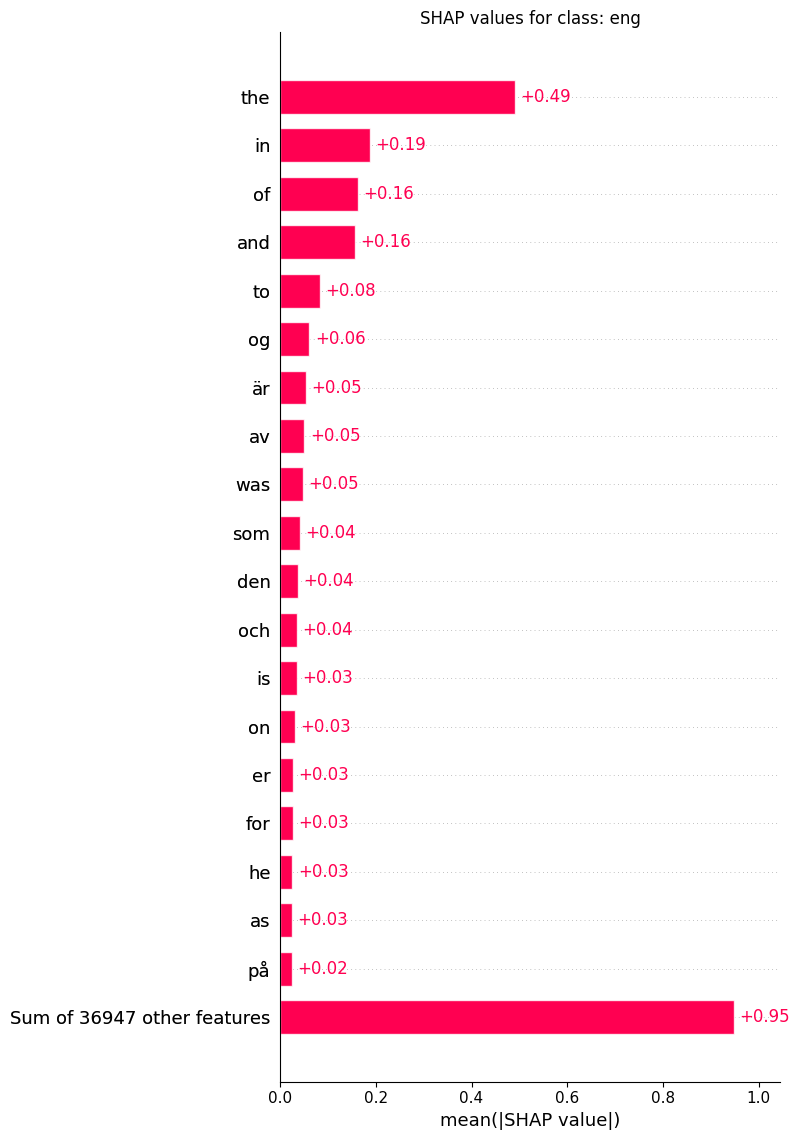

<ipython-input-32-3427e658a05a>:7: UserWarning: Glyph 12414 (\N{HIRAGANA LETTER MA}) missing from current font.
  plt.tight_layout()
<ipython-input-32-3427e658a05a>:7: UserWarning: Glyph 12383 (\N{HIRAGANA LETTER TA}) missing from current font.
  plt.tight_layout()


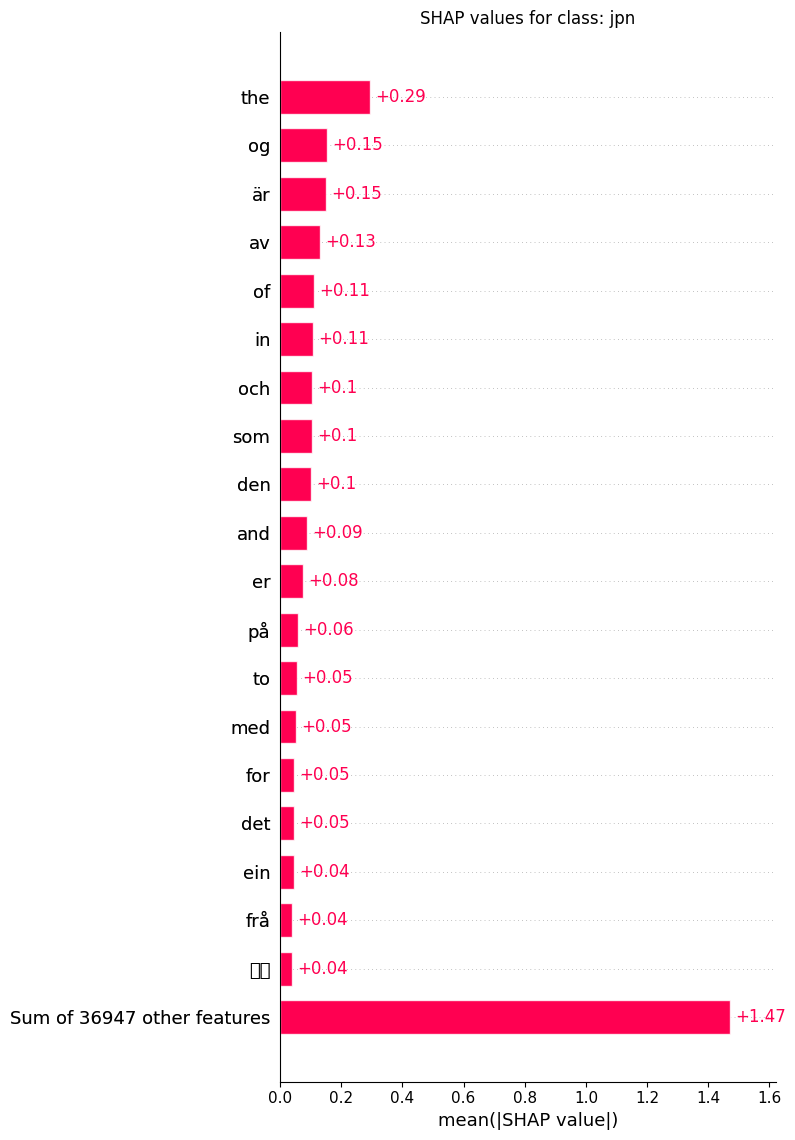

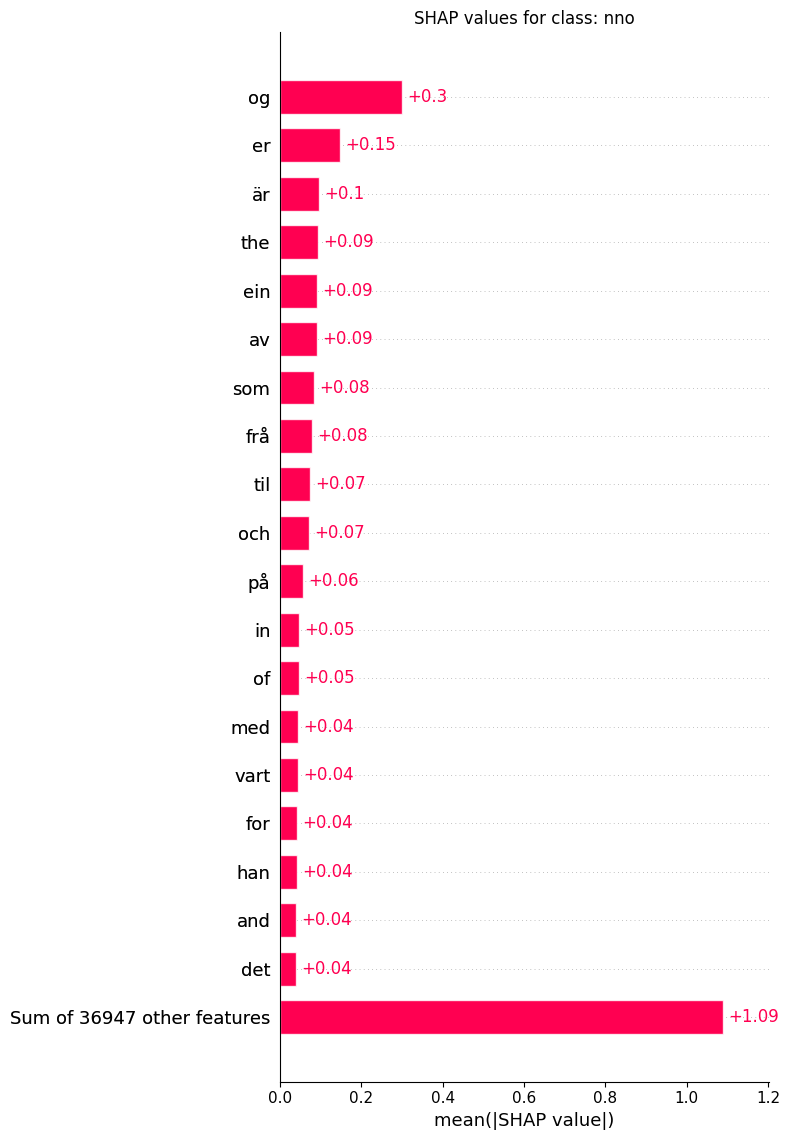

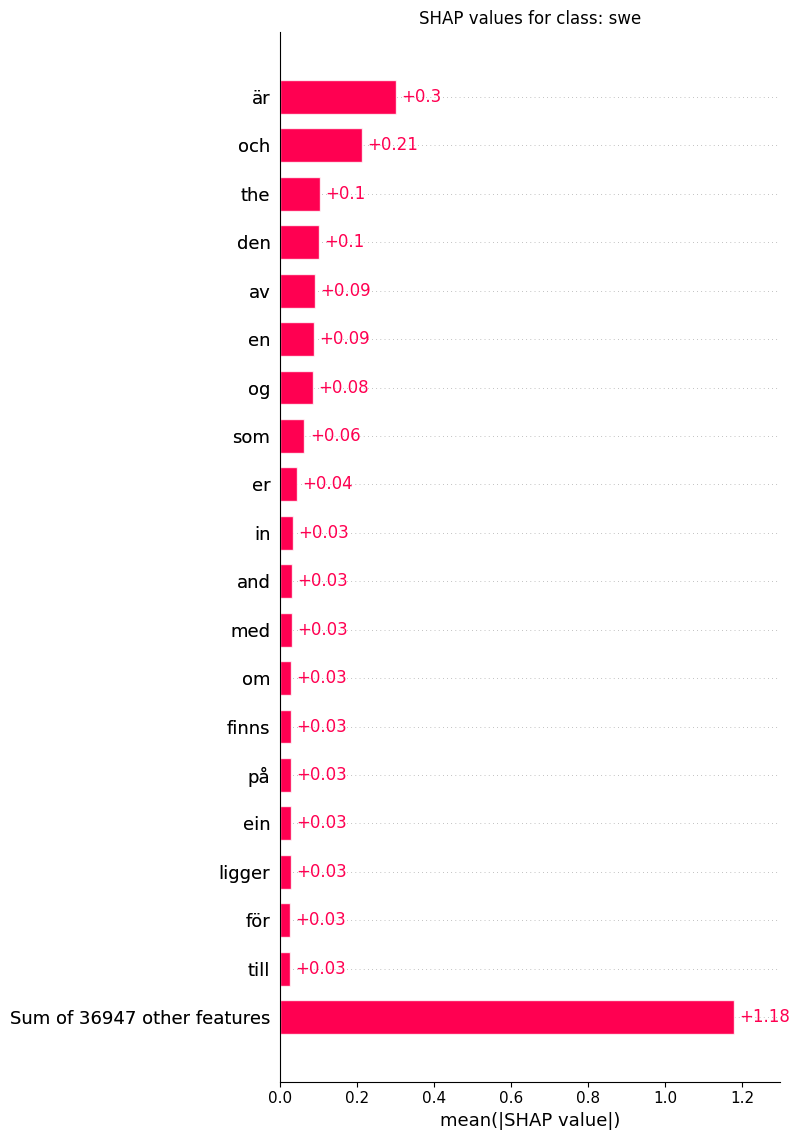

In [32]:
for i, subsubset in enumerate(subsubsets):
    # bar plot
    figsize = (10, 10)
    plt.figure(figsize=figsize)
    shap.plots.bar(shap_values[:, :, i], max_display=20, show=False)
    plt.title(f"SHAP values for class: {subsubset}")
    plt.tight_layout()
    plt.show()

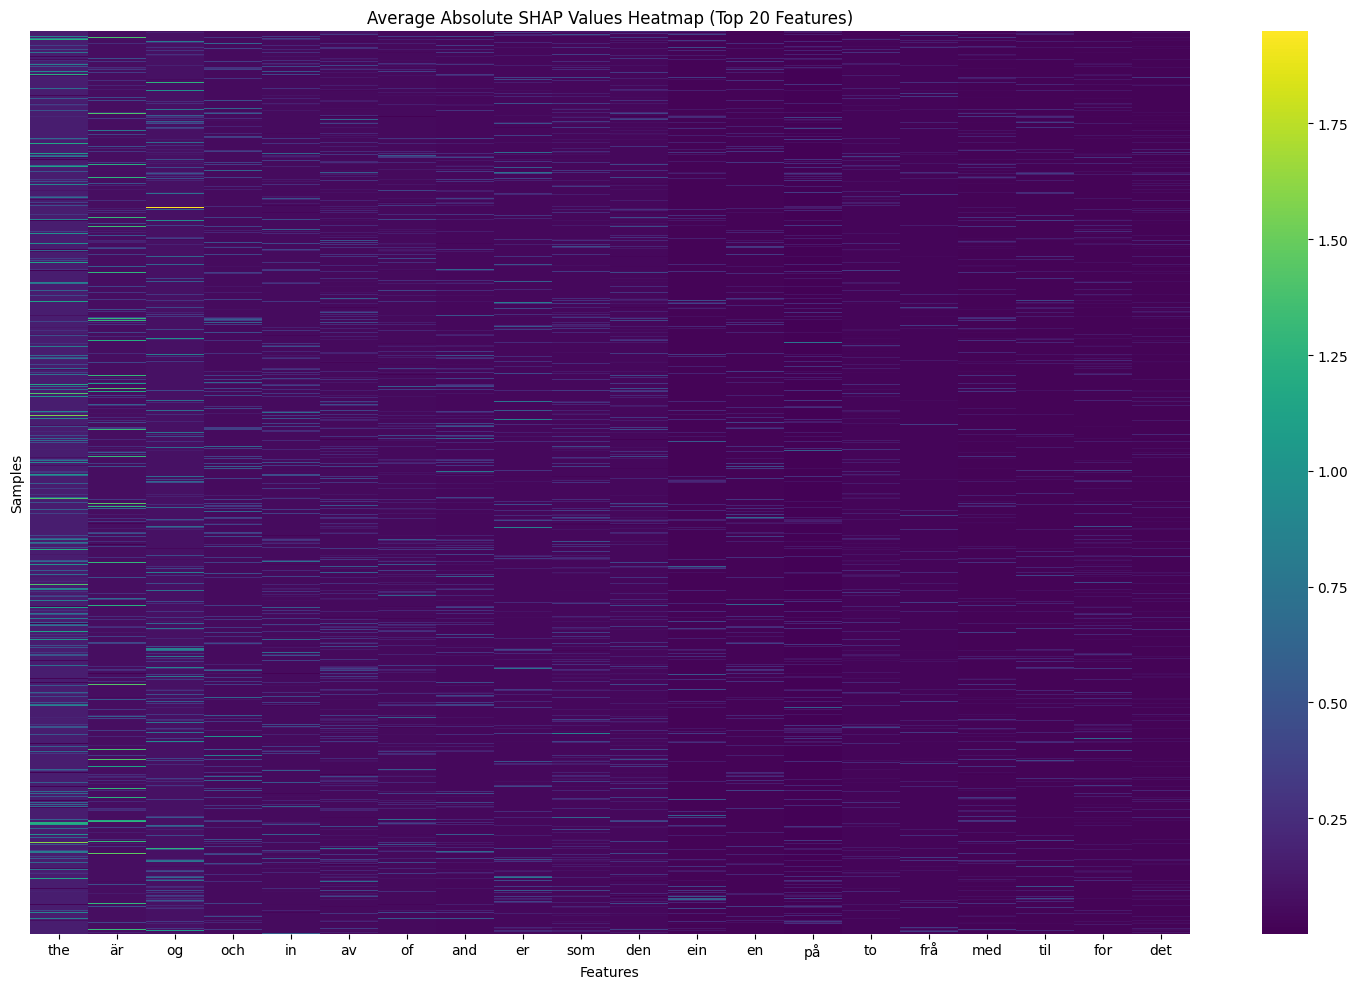

In [33]:
avg_shap_values = np.abs(shap_values.values).mean(axis=2)
top_features = avg_shap_values.mean(axis=0).argsort()[-20:][::-1]  # Top 20 features

plt.figure(figsize=(15, 10))
sns.heatmap(avg_shap_values[:, top_features],
            xticklabels=[feature_names[i] for i in top_features],
            yticklabels=False,
            cmap='viridis')
plt.title("Average Absolute SHAP Values Heatmap (Top 20 Features)")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.tight_layout()
plt.show()

---

### 6.1 Ablation Study

Lastly, we want to conduct a small ablation study to investigate how well our model performs under different conditions.

As a first step, choose the two languages for which the classifier worked best.

Next, re-fit the best model six times, each time reducing the **length** of each instance in the training set. To do this, create a custom `TextReducer` class that you can include as a preprocessing step in your pipeline. The class should take a `max_len` argument as a hyperparameter that can be set to train the following models:

- Model 1: `max_len = None` (i.e. no truncation!)
- Model 2: `max_len = 500`
- Model 3: `max_len = 250`
- Model 4: `max_len = 150`
- Model 5: `max_len = 100`
- Model 6: `max_len = 50`

Use average accuracy over the cross validation scores for each model to measure performance for each ablation setting.

📝❓ How does the reduction of training data affect the performance of the classifier? And what could be some possible reasons for this?

In [34]:
# TODO: Ablation study
from sklearn.base import BaseEstimator, TransformerMixin
best_predicted_languages = ['ara', 'tam']

class TextReducer(BaseEstimator, TransformerMixin):
    def __init__(self, max_len=None):
        self.max_len = max_len

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.max_len is None:
            return X

        return X.apply(lambda text: text[:self.max_len])



def create_pipeline(max_len):
    pipee = Pipeline([
        ('reduce', TextReducer(max_len=max_len)),
        ('vect', CountVectorizer()),
        ('clf', LogisticRegression(random_state=42, max_iter=5000)),
    ])
    return pipee


In [35]:


# Filter the data for the two selected languages
train_subset_best = train_subset[train_subset['label'].isin(best_predicted_languages)]
x_train_best = train_subset_best['text']
y_train_best = label_encoder.transform(train_subset_best['label'])

# Given max lengths
max_len_values = [None, 500, 250, 150, 100, 50]

# Fit and evaluate models with different truncation lengths
for max_len in max_len_values:
    print(f"\nTraining model with max_len={max_len}")
    pipee = create_pipeline(max_len)

    # Evaluate with cross-validation
    result = cross_val_score(pipee, x_train_best, y_train_best, cv=5)
    print(f'CV scores for max_len={max_len}: {result}')
    print(f'Average CV score for max_len={max_len}: {result.mean():.3f}')



Training model with max_len=None
CV scores for max_len=None: [0.99       1.         1.         1.         0.99666667]
Average CV score for max_len=None: 0.997

Training model with max_len=500
CV scores for max_len=500: [0.99333333 1.         1.         1.         0.99666667]
Average CV score for max_len=500: 0.998

Training model with max_len=250
CV scores for max_len=250: [0.99       1.         1.         1.         0.99666667]
Average CV score for max_len=250: 0.997

Training model with max_len=150
CV scores for max_len=150: [0.98333333 0.99       0.99666667 0.99666667 0.99666667]
Average CV score for max_len=150: 0.993

Training model with max_len=100
CV scores for max_len=100: [0.98666667 0.99333333 1.         0.99666667 1.        ]
Average CV score for max_len=100: 0.995

Training model with max_len=50
CV scores for max_len=50: [0.97666667 0.99       0.99       1.         0.99      ]
Average CV score for max_len=50: 0.989


---

📝❓ Write your lab report here addressing all questions in the notebook

1.1:  


📝❓ Do you notice anything that might be challenging for the classification?

1: Neither of the datasets has any missing/null values, so there are no missing data. But, in many languages, there are a lot of data points which contain non-language special characters and numbers, this might cause some challenges in classification.   


📝❓ How is the data distributed? (i.e., how many instances per label are there in the training and test set? Is it a balanced dataset?)

->The data in the original data sets is consistently distributed with 500 instances per label. I feel that it is a well-balanced dataset.

📝❓ Do you think the train/test split is appropriate (i.e., is the test data representative of the training data)? If not, please rearrange the data in a more appropriate way.

-> The original train/test split is a 50/50 split, which is not ideal for training an ML model. There are 117500 rows in each dataset.
To rectify this, the original train/test datasets were concatenated into a single dataset, then the train/test split was rearranged to a 75/25 split.
(Note: after the rearrangement, the train split has 712 - 786 instances per label, and the test split has 214 - 288 instances per split. This is not a perfectly balanced dataset, but the ratio is still decent and workable.)



3.2:

📝❓ What were the hyperparameter combinations for your best-performing model on the test set.


-> The hyperparameters for our best-performing model on the test set are:

'clf__penalty': 'l2'

'clf__solver': 'liblinear'

'vect__max_features': 800

'vect__ngram_range': (1, 1)



📝❓ What is the advantage of grid search cross-validation?

-> Through grid search cross-validation, we can identify the best-performing model configurations under a defined parameter grid, which can be really challenging and time-consuming manually. Even with GridSearchCV, when the parameter grid which we define is big, then it might increase the runtime a lot (but still a lot less compared to the time it would have taken to do the same process manually using the trial-and-error method)



3.3:

📝❓ According to standard metrics (e.g. Accurracy, Precision, Recall and F1), how well does your model perform on the heldout test set?

-> According to the standard metrics, our model got the following scores;

Accuracy: 0.9470

Precision: 0.9579

Recall: 0.9470

F1-Score: 0.9489

The model performed well on the heldout test set with decently high accuracy, precision, recall, and F1-score. The high precision indicates that false positives are rare, while the high recall indicates that false negatives are rare.



4.1:

📝❓ Where does your model do well and where does it fail?

->The model has worked well for all the languages which have a Latin-related script. It can also be seen that the model has good performance for the languages Arabic, Hindi, Kannada, Tamil and Thai. These languages use a non-Latin script, by which we can tell that the model has high performance for non-Latin scripts as well, provided there is no other language in the subset related to that language.


📝❓ What are some possible reasons for why it fails in these cases?

->It can be seen that there was a lot of misclassification for Korean and Japanese (Both have a similar system of honorifics). Furthermore, there was misclassification for Bulgarian and Russian (both being Cyrillic scripts). Having a much elaborated feature extraction might help in mitigating this problem.


5.1:

📝❓ What is more important, extra features or the outputs of the vectorizer? Please discuss.

-> In the context of language classification, outputs of vectorizer is much more important than the extra features. The vecrotizer understands word patterns, n-grams, etc, which are important for classifying a language. While extra features are more important when dealing with text with a lot of metadata.



6.1:

📝❓ How does the reduction of training data affect the performance of the classifier? And what could be some possible reasons for this?

-> The reduction of training data definitely affects the performance of the classifier. The model requires a lot of contextual information and characteristic features for effective classification. Reduction of training data will affect this by creating short text ambiguity.